
# Project: Investigate a Dataset (TMDb movie data)
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
   
  

In [94]:


#importing important libs
import pandas as pd #:) panda is life! 
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.plotly as py 
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
**Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [95]:
# Load your data and print out a few lines. Perform operations to inspect data\n",
#   types and look for instances of missing or possibly errant data.

#lendo o arquivo csv e armazenando-o na variável "data_movies".
data_movies = pd.read_csv('tmdb-movies.csv')

#displaying the first five lines of the variable "data_movies".
data_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Cleaning (removing unnecessary information to analyze)
<ul>
<li><a href="#dc01">1. Deleting columns that are not used</a></li>
<li><a href="#dc02">2. Removing duplicate rows</a></li>
<li><a href="#dc03">3. Removing 0 from the budget column and from the revenue column</a></li>
<li><a href="#dc04">4. Modifying the release_date column in date format</a></li>
</ul> 

<a id='dc01'></a>
### 1.Deleting columns that are not used 
The columns to be deleted are: "id", "imdb_id","homepage"

In [96]:
#vector "column_names" with the name of the columns to delete
column_names = ['id','imdb_id','homepage']

#deleting the columns
data_movies= data_movies.drop(column_names,1)

#data frame info
data_movies.info()

#displaying the dataset
data_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 1.1+ MB


,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='dc02'></a>
### 2. Removing duplicate rows


In [97]:
rows, col = data_movies.shape
#totais liting and column in data frame
print('There are {} movie listings and {} column'.format(rows-1, col))

There are 10865 movie listings and 18 column


In [98]:
data_movies.drop_duplicates(keep ='first', inplace=True)
rows, col = data_movies.shape

print('There are {} movie listings and {} column'.format(rows-1, col))

There are 10864 movie listings and 18 column


<a id='dc03'></a>
### 3. Removing 0 from the budget column and from the revenue column
 

In [99]:
# creating a temp list of revenue and budget column
temp_list=['budget', 'revenue']

#Convert any value from '0' to NAN in the list
data_movies[temp_list] = data_movies[temp_list].replace(0, np.NAN)

#Removing all rows that have value equal to NaN in temp_list
data_movies.dropna(subset = temp_list, inplace = True)

rows, col = data_movies.shape
print('we have {} movies now.'.format(rows-1))

we have 3853 movies now.


<a id='dc04'></a>
### 4. Modifying the release_date column in date format


In [100]:
#Modifying the Date Format
data_movies.release_date = pd.to_datetime(data_movies['release_date'])
#read type columns in data frame
data_movies.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
### Questions:
          
<ul>
<li><a href="#edaq01">  What is the profit distribution between films?</a></li>
<li><a href="#edaq02">  What is the total, maximum, minimum and medium value of the movie's profit?</a></li>
<li><a href="#edaq03">  What is the most popular movie genre?</a></li>
<li><a href="#edaq04">  Who are the artists who participated most in the films?</a></li>
<li><a href="#edaq05">  Who are the directors who made more movies?</a></li>
</ul>

<a id='edaq01'></a>
### Research Question 1: What is the profit distribution between films?


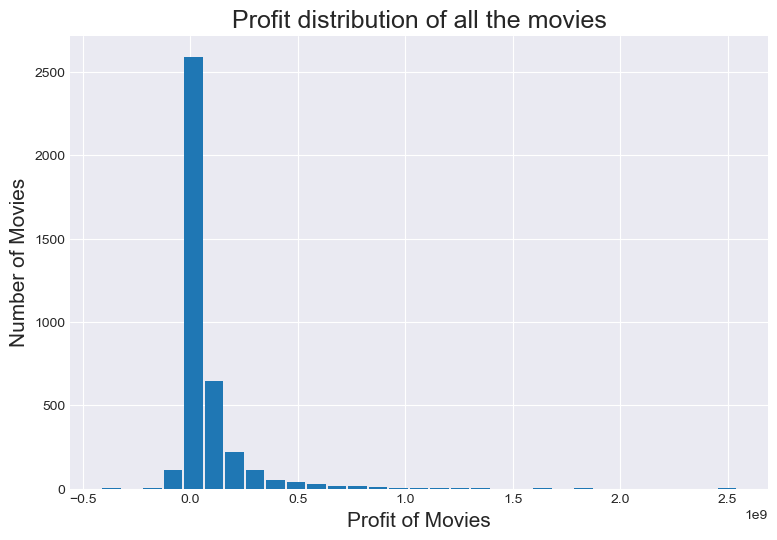

In [101]:
#Plotting a Profit Histogram of Movies 

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Profit of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Profit distribution of all the movies', fontsize=18)

#giving a histogram plot

plt.hist(data_movies['revenue'] - data_movies['budget'], rwidth = 0.9, bins =31)
#plt.hist(data_movies['budget_adj'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()
   
    


**Observations**: We have more than 2500 films that had neither profit nor profit.

<a id='edaq02'></a>
### Research Question 2: What is the total, maximum, minimum and medium value of the movie's profit?

In [102]:
Profit = data_movies['revenue'] - data_movies['budget']
print(" Total Profit:  "+ str(Profit.sum()))
print(" Max Profit:  "+ str(Profit.max()))
print(" Median Profit:  "+ str(Profit.median()))
print(" Mim Profit: "+str(Profit.min()) ) # Profit number < 0 = prejudice :(

 Total Profit:  271641170378.0
 Max Profit:  2544505847.0
 Median Profit:  20020190.0
 Mim Profit: -413912431.0


**Observations**: A profit less than zero means that the film generated loss

<a id='edaq03'></a>
### Research Question 3: What is the most popular movie genre?


Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64


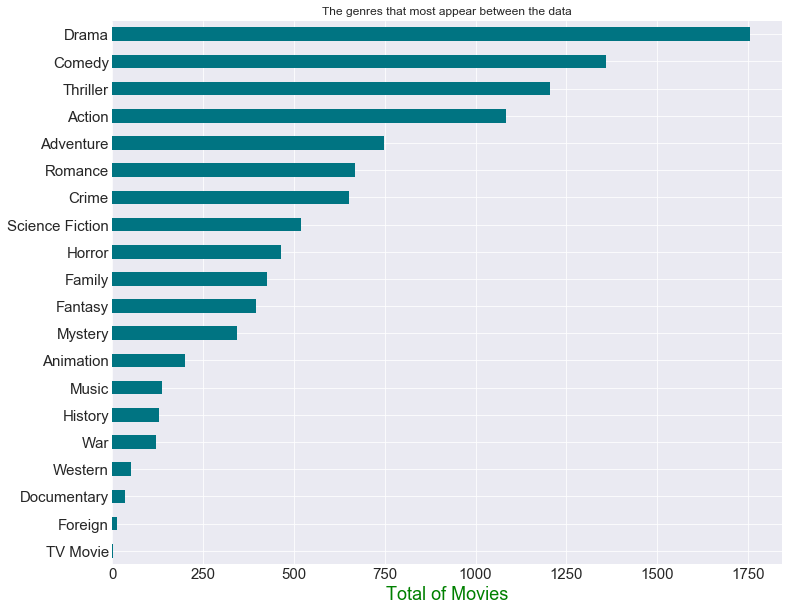

In [103]:
#count values in data_movies
def count_data(column_name):
    #will take a column, and separate the string by '|'
    to_all_data = data_movies[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    to_all_data = pd.Series(to_all_data.split('|'))
    
    #this will us value in descending order
    count = to_all_data.value_counts()
    
    return count


genres_count =  count_data('genres')
print(genres_count )



genres_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genres_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The genres that most appear between the data')

#x-label
ax.set_xlabel('Total of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()


**Observations**: The TV son-in-law has only one film, but that does not mean that others can not appear on TV.

<a id='edaq04'></a>
### Research Question 4 : Who are the artists who participated most in the films?

In [104]:
cast_count = count_data('cast')
#printing top 10 casts
cast_count.head(10)



Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Harrison Ford         34
Brad Pitt             34
Tom Hanks             34
Sylvester Stallone    34
dtype: int64

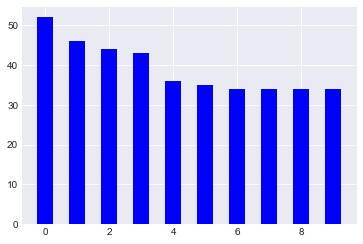

In [105]:
y = cast_count.head(10)
N = len(y)
x = range(N)
width = 0.5
plt.bar(x, y, width, color="BLUE")
plt.show()

**Observations**: The cast is set up only with the name of the famous actors who are in the film.


<a id='edaq05'></a>
### Research Question 5: Who are the directors who made more movies?

In [106]:
director_count = count_data('director')
#printing top 10 directors
director_count.head(10)

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Robert Rodriguez     17
Martin Scorsese      17
Tim Burton           17
Steven Soderbergh    17
Brian De Palma       15
Renny Harlin         15
dtype: int64

<a id='conclusions'></a>
# Conclusions

<ul>
<li><a href="#edaq01">  What is the profit distribution between films?</a> <br/>we have more than 2500 without profit and no loss, few with more than one million and some with negative profit values or prejudice<br/></li>
<li><a href="#edaq02">  What is the total, maximum, minimum and medium value of the movie's profit?</a><br/>some movies had millionaire losses as is the case of the minimum value of profit found, besides the small value to be close to the one of the total found<br></li>
<li><a href="#edaq03">  What is the most popular movie genre?</a><br/>The most popular genre is drama, having a total of 1756 movies in this category.<br/></li>
<li><a href="#edaq04">  Who are the artists who participated most in the films?</a><br/>The actors are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, Matt Damon, Johnny Depp, Harrison Ford, Brad Pitt, Tom Hanks, Sylvester Stallone<br/></li>
<li><a href="#edaq05">  Who are the directors who made more movies?</a><br/>the directors are Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Robert Rodriguez, Martin Scorsese, Tim Burton, Steven Soderbergh, Brian De Palma, Renny Harlin<br/></li>
</ul>

## Limitations:
* Question about the type of coin in the columns "budget" and "revenue"
* Null values in file